# 1. Business Understanding

A global company has experienced a decline in sales over the past six months. Despite an established customer base and a diverse catalog, revenue has been steadily declining. The marketing team has tried various strategies, such as discounts and general promotions, but these tactics have not been able to stop the decline in sales. Given this situation, management believes that they should start implementing strategies based on the purchasing profile of each customer. Thus, they have identified an opportunity to apply a customer segmentation strategy based on RFM (Recency, Frequency, Monetary Value) analysis with the ultimate goal of improving the company's performance.

# 2. Data Understanding

**Packages required**

In [1]:
import pandas as pd #Data manipulation
import matplotlib.pyplot as plt #Visualizations
import seaborn as sns #Visualizations
import numpy as np #Numerical operations

**Read data**

In [2]:
df = pd.read_csv(r"C:/Users/Usuario/Downloads/0_data_general/py_projects_pred/data/online_retail.csv", sep=";")
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
99863,498780,21671,RED SPOT CERAMIC DRAWER KNOB,3,23/02/2010 10:50,2.51,NaN,United Kingdom
437608,531247,85123A,WHITE HANGING HEART T-LIGHT HOLDER,5,07/11/2010 10:57,2.95,16923.0,United Kingdom
443756,531730,85135B,BLUE DRAGONFLY HELICOPTER,1,09/11/2010 12:10,7.95,12849.0,United Kingdom
358664,524160,22865,HAND WARMER OWL DESIGN,5,27/09/2010 16:15,2.10,17757.0,United Kingdom
498553,535993,72802C,VANILLA SCENT CANDLE JEWELLED BOX,6,29/11/2010 13:42,4.25,12870.0,United Kingdom
58985,494673,84670,JAPANESE CROCHETED ANIMAL,14,17/01/2010 15:52,0.42,15311.0,United Kingdom
99359,498725,84997C,BLUE 3 PIECE MINI DOTS CUTLERY SET,2,22/02/2010 15:12,3.75,14667.0,United Kingdom
423636,529850,21231,SWEETHEART CERAMIC TRINKET BOX,2,31/10/2010 13:35,1.25,16788.0,United Kingdom
402556,527950,20982,12 PENCILS TALL TUBE SKULLS,4,19/10/2010 15:33,0.85,16795.0,United Kingdom
477,489522,20782,CAMOUFLAGE EAR MUFF HEADPHONES,1,01/12/2009 11:45,5.49,15998.0,United Kingdom


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Correct format for InvoiceDate

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Description of numeric variables

In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


Description of categorical variables

In [7]:
df.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


There are null values for Custor ID, it has 417534 cases, while the data frame has 525461, let's find out why

In [8]:
df["Customer ID"].isna().sum()

107927

In [9]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Let's see how the negative Quantity looks like

In [10]:
df[df["Quantity"] < 0] .head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


We have Invoice values which starts with the letter C, let's see if we have another values in it

In [11]:
df["Invoice"] = df["Invoice"].astype("str") #As string to use regex
df[df["Invoice"].str.match("^\\d{6}$") == False] #String that starts with only 6 digits

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


Let's check if C the only letter that each Invoice starts with

In [12]:
df["Invoice"].str.replace("[0-9]", "", regex = True). unique() #Replace all digits with "", so only keeps letters, it's a clever trick

array(['', 'C', 'A'], dtype=object)

Let's see what info have these cases that start with letter "A"

In [13]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Verification of StockCode

In [14]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


We identified that there are more letters besides the 5 digits, now let's verify if there are other patterns. The results will show StockCodes that don't have numbers or or don't have numbers and letters, so will show just letters or characters. We added the unique() to check each value in the column "StockCode":

In [15]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

We should verify each value to see if they are legit

In [16]:
df[df["StockCode"].str.match("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


Let's check if the country names are correct

In [17]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

Deep dive in EIRE, Unspecified, RSA

In [18]:
df[(df["Country"] == "Unspecified") & (df["Customer ID"].isna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
437145,531208,75131,METAL TUBE CHIME ON BAMBOO,1,2010-11-05 16:03:00,1.69,NaN,Unspecified
437146,531208,22306,SILVER MUG BONE CHINA TREE OF LIFE,4,2010-11-05 16:03:00,1.95,NaN,Unspecified
437147,531208,21038,SET/4 MODERN VINTAGE COTTON NAPKINS,1,2010-11-05 16:03:00,2.95,NaN,Unspecified
437148,531208,21836,GINGHAM OVEN GLOVE RED HEART,2,2010-11-05 16:03:00,3.75,NaN,Unspecified
437149,531208,22249,DECORATION WHITE CHICK MAGIC GARDEN,6,2010-11-05 16:03:00,0.85,NaN,Unspecified
437150,531208,22581,WOOD STOCKING CHRISTMAS SCANDISPOT,6,2010-11-05 16:03:00,0.85,NaN,Unspecified
437151,531208,21446,12 RED ROSE PEG PLACE SETTINGS,2,2010-11-05 16:03:00,1.25,NaN,Unspecified
437152,531208,22639,SET OF 4 NAPKIN CHARMS HEARTS,1,2010-11-05 16:03:00,2.55,NaN,Unspecified
437153,531208,22604,SET OF 4 NAPKIN CHARMS CUTLERY,2,2010-11-05 16:03:00,2.55,NaN,Unspecified
437154,531208,22642,SET OF 4 NAPKIN CHARMS STARS,10,2010-11-05 16:03:00,2.55,NaN,Unspecified


All have NaN in Customer ID and some negative Quantity

# 3. Data Preparation

**Packages required**

In [19]:
from sklearn.preprocessing import StandardScaler #Data preparation

## 3.1 Cleaning

A copy of our dataset

In [20]:
cleaned_df = df.copy()

Let's start by cleaning the Invoice variable

In [21]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str") #Conversion to use regex
digits = (cleaned_df["Invoice"].str.match("^\\d{6}$") == True) #Keeps the values that have 6 digits
cleaned_df = cleaned_df[digits] #Select only the values that match digits
cleaned_df #Result

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Cleaning the StockCode variable

In [22]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str") #Conversion to use regex
digits2 = ((cleaned_df["StockCode"].str.match("^\\d{5}$") == True) #Keeps the values that have 5 digits
           | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]$") == True) #Keeps the values that have 5 digits and follow by letters
           | (cleaned_df["StockCode"].str.match("^PADS$") == True)) #Keeps the values that have the PAD pattern
cleaned_df = cleaned_df[digits2] #Select only the values that match digits2
cleaned_df #Result

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Cleaning the Customer ID variable

In [23]:
cleaned_df.dropna(subset=["Customer ID"], inplace = True) #Drop all NaN from the variable Customer ID in cleaned_df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20180\676652225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace = True) #Drop all NaN from the variable Customer ID in cleaned_df


In [24]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,405555.000000,405555,405555.000000,405555.000000
mean,13.624024,2010-07-01 12:37:55.533823744,2.985737,15373.275965
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:16:00,1.250000,14004.000000
50%,5.000000,2010-07-11 10:28:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:23:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.075664,NaN,4.287946,1677.247500


Why are there Price = 0 items? We'll drop them

In [25]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [26]:
cleaned_df.drop(cleaned_df[cleaned_df["Price"] == 0].index, inplace=True) #Drop all Price = 0 in cleaned_df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20180\4075179566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[cleaned_df["Price"] == 0].index, inplace=True) #Drop all Price = 0 in cleaned_df


In [27]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,405527.000000,405527,405527.000000,405527.000000
mean,13.622846,2010-07-01 12:41:15.852705280,2.985943,15373.365389
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:16:00,1.250000,14004.000000
50%,5.000000,2010-07-11 10:28:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:23:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.073841,NaN,4.288022,1677.211001


We'll drop cases where Country is unspecified

In [28]:
cleaned_df.drop(cleaned_df[cleaned_df["Country"] == "Unspecified"].index, inplace=True) #Drop all Unspecified in cleaned_df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20180\989099330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(cleaned_df[cleaned_df["Country"] == "Unspecified"].index, inplace=True) #Drop all Unspecified in cleaned_df


In [29]:
cleaned_df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Denmark', 'Netherlands', 'Poland', 'Channel Islands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'USA', 'Japan', 'Malta', 'RSA', 'Singapore',
       'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'Nigeria',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

We are done, let's check how many cases we drop during the cleaning process

In [30]:
print("We dropped", round(1- (len(cleaned_df) / len(df)),4)*100, "percent cases.")

We dropped 22.88 percent cases.


## 3.2 Feature engineering

First calculate the monetary value as sales for our RFM clustering

In [31]:
cleaned_df["Sales"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df.sample(10)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20180\2802262426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Sales"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
323948,520952,22682,"FRENCH BLUE METAL DOOR SIGN, 7",6,2010-09-01 11:43:00,1.25,14901.0,United Kingdom,7.50
89080,497817,22254,FELT TOADSTOOL LARGE,12,2010-02-12 14:54:00,1.25,15278.0,United Kingdom,15.00
106500,499542,84800M,MEDIUM WHITE/PINK ROSE ART FLOWER,6,2010-03-01 11:59:00,1.69,14131.0,United Kingdom,10.14
160957,504808,84627,CANDY STRIPE ROSE C/COVER,1,2010-04-16 12:28:00,5.95,17841.0,United Kingdom,5.95
297255,518346,35970,ZINC FOLKART SLEIGH BELLS,12,2010-08-06 14:09:00,1.69,13929.0,United Kingdom,20.28
281110,516758,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4,2010-07-22 16:37:00,3.75,14861.0,United Kingdom,15.00
396140,527385,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2010-10-17 13:06:00,7.95,16381.0,United Kingdom,7.95
246504,513259,84992,72 SWEETHEART FAIRY CAKE CASES,24,2010-06-23 10:53:00,0.55,15785.0,United Kingdom,13.20
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom,2.10
289727,517575,40003,WHITE BAMBOO RIBS LAMPSHADE,12,2010-07-30 10:18:00,1.25,14221.0,United Kingdom,15.00


We'll aggregate the values for each Customer ID

In [32]:
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False) \
    .agg(MonetaryValue = ("Sales", "sum"), #Creates Monetary value based on the sum of sales
         Frequency = ("Invoice", "nunique"), #Creates Frequency based on the number of unique Invoice
         LastInvoiceDate = ("InvoiceDate", "max")) #Creates LastInvoiceDate based on the last InvoiceDate

aggregated_df.sample(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
1937,15073.0,1744.61,5,2010-11-04 10:26:00
2955,16477.0,1825.56,5,2010-12-03 12:48:00
3536,17275.0,114.52,1,2010-11-21 13:26:00
3828,17667.0,1868.19,4,2010-09-30 12:19:00
2576,15971.0,1702.98,6,2010-11-19 10:43:00
2403,15732.0,1387.95,9,2010-12-02 15:00:00
768,13481.0,2026.28,6,2010-11-30 10:32:00
458,13044.0,4293.43,10,2010-08-04 16:27:00
4037,17952.0,819.61,4,2010-11-26 13:54:00
1614,14643.0,986.08,3,2010-04-01 08:33:00


Now we'll create the Recency based on the last purchace in LastInvoiceDate

In [33]:
max_invoice_data = aggregated_df["LastInvoiceDate"].max() #The very last purchase
aggregated_df["Recency"] = (max_invoice_data - aggregated_df["LastInvoiceDate"]).dt.days #Difference in days
aggregated_df.sample(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
2237,15498.0,12461.58,19,2010-12-08 14:46:00,1
4062,17983.0,171.71,1,2010-11-09 13:24:00,30
4199,18175.0,176.10,1,2010-02-02 10:25:00,310
4209,18190.0,461.16,3,2010-04-15 09:45:00,238
459,13045.0,503.64,2,2010-11-03 12:49:00,36
347,12897.0,297.75,2,2010-11-23 13:29:00,16
1119,13968.0,123.66,1,2010-10-12 13:22:00,58
2780,16239.0,1078.00,4,2010-11-22 16:27:00,17
1563,14575.0,460.71,1,2010-08-08 14:51:00,123
1250,14151.0,679.45,2,2010-02-04 15:35:00,308


Let's see the distribution of my new variables

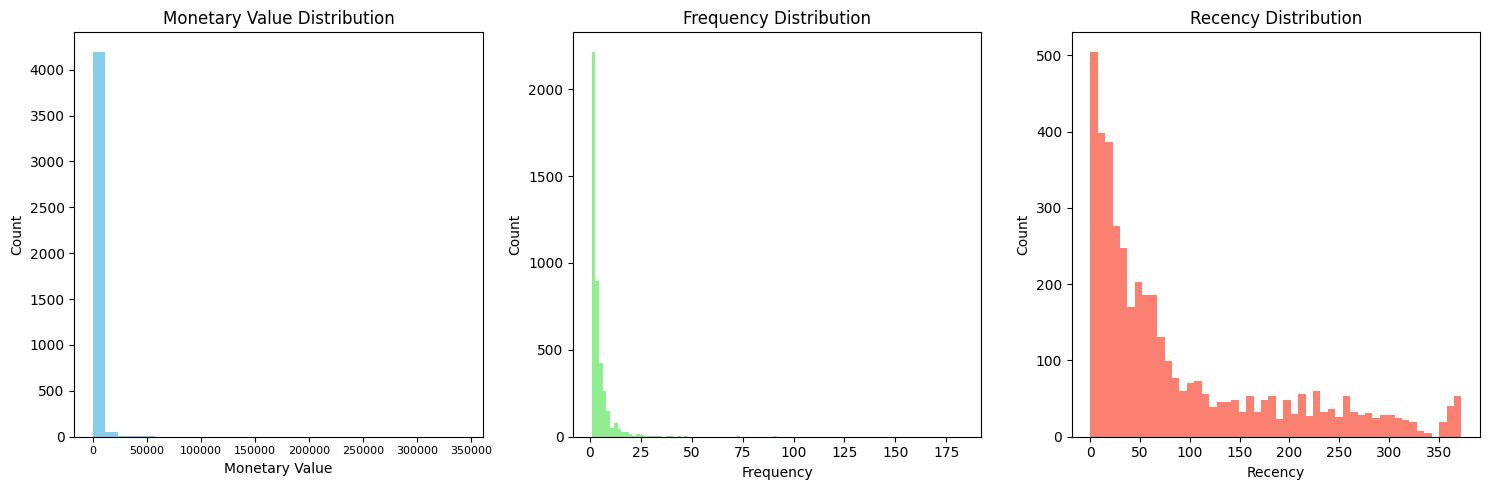

In [34]:
#My figure
plt.figure(figsize=(15, 5))

#Histogram of MonetaryValue
plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"], bins=30, color="skyblue")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.xticks(fontsize=8)
plt.ylabel("Count")

#Histogram of Frequency
plt.subplot(1, 3, 2)
plt.hist(aggregated_df["Frequency"], bins=100, color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

#Histogram of Recency
plt.subplot(1, 3, 3)
plt.hist(aggregated_df["Recency"], bins=50, color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

#Adjusting paddings
plt.tight_layout()
plt.show()

There are probably outliers in all the variables, so we'll check them

## 3.3 Outier detection

Boxplot to detect univariate outliers

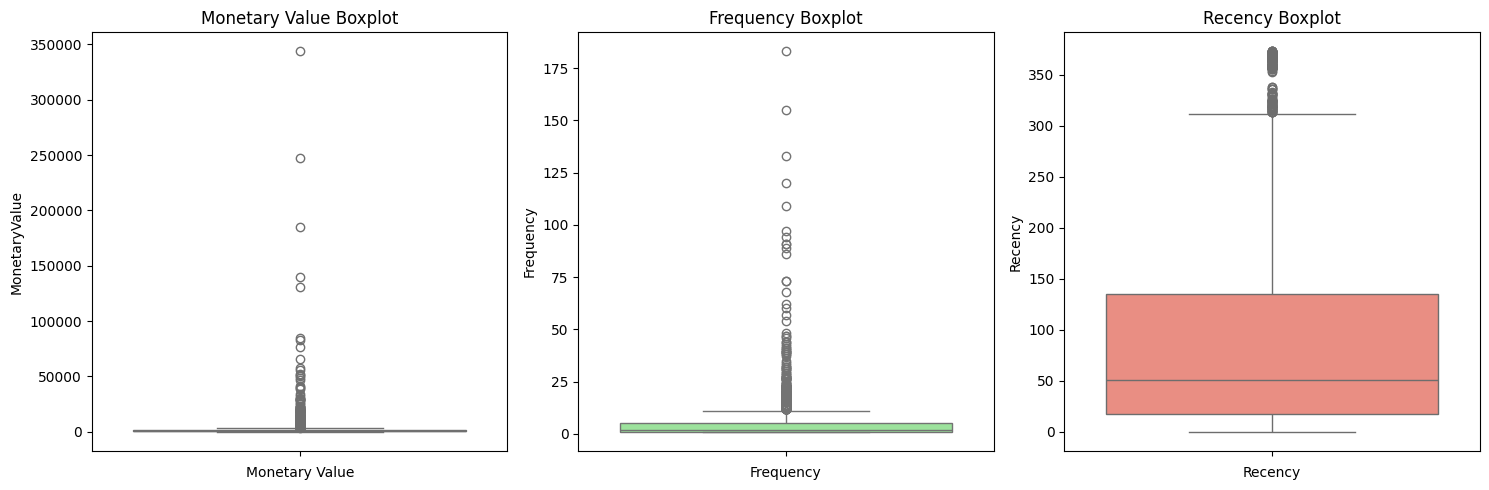

In [35]:
#My figure
plt.figure(figsize=(15, 5))

#Boxplot of MonetaryValue
plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

#Boxplot of Frequency
plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

#Boxplot of Recency
plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

#Adjusting paddings
plt.tight_layout()
plt.show()

Indeed looks like there are outliers, let's plot a scatterplot for each combination

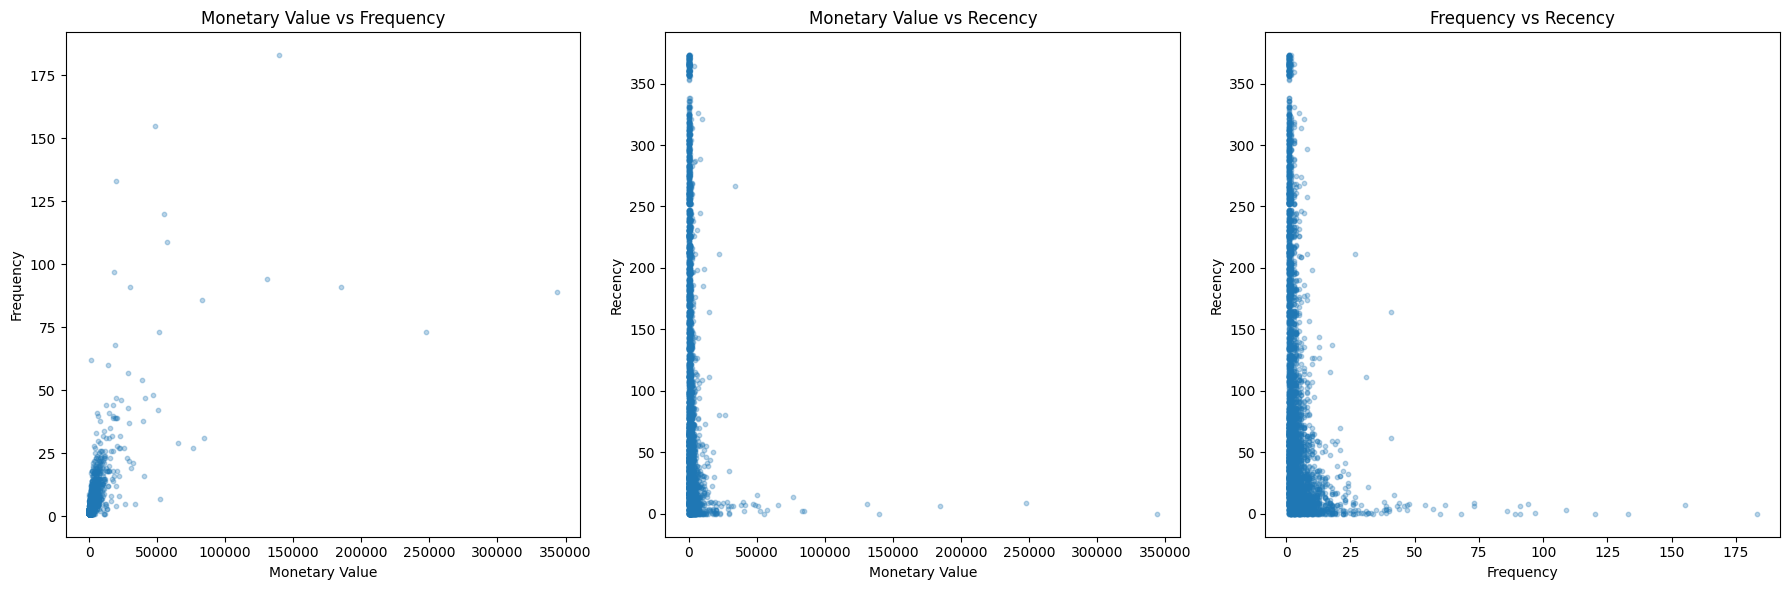

In [36]:
#Variables to plot
x = aggregated_df["MonetaryValue"]
y = aggregated_df["Frequency"]
z = aggregated_df["Recency"]

#Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(x, y, s=10, alpha=0.3)
axes[0].set_title('Monetary Value vs Frequency')
axes[0].set_xlabel('Monetary Value')
axes[0].set_ylabel('Frequency')

axes[1].scatter(x, z, s=10, alpha=0.3)
axes[1].set_title('Monetary Value vs Recency')
axes[1].set_xlabel('Monetary Value')
axes[1].set_ylabel('Recency')

axes[2].scatter(y, z, s=10, alpha=0.3)
axes[2].set_title('Frequency vs Recency')
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Recency')

fig.tight_layout()
plt.show()

A 3D plot to better visualize outliers

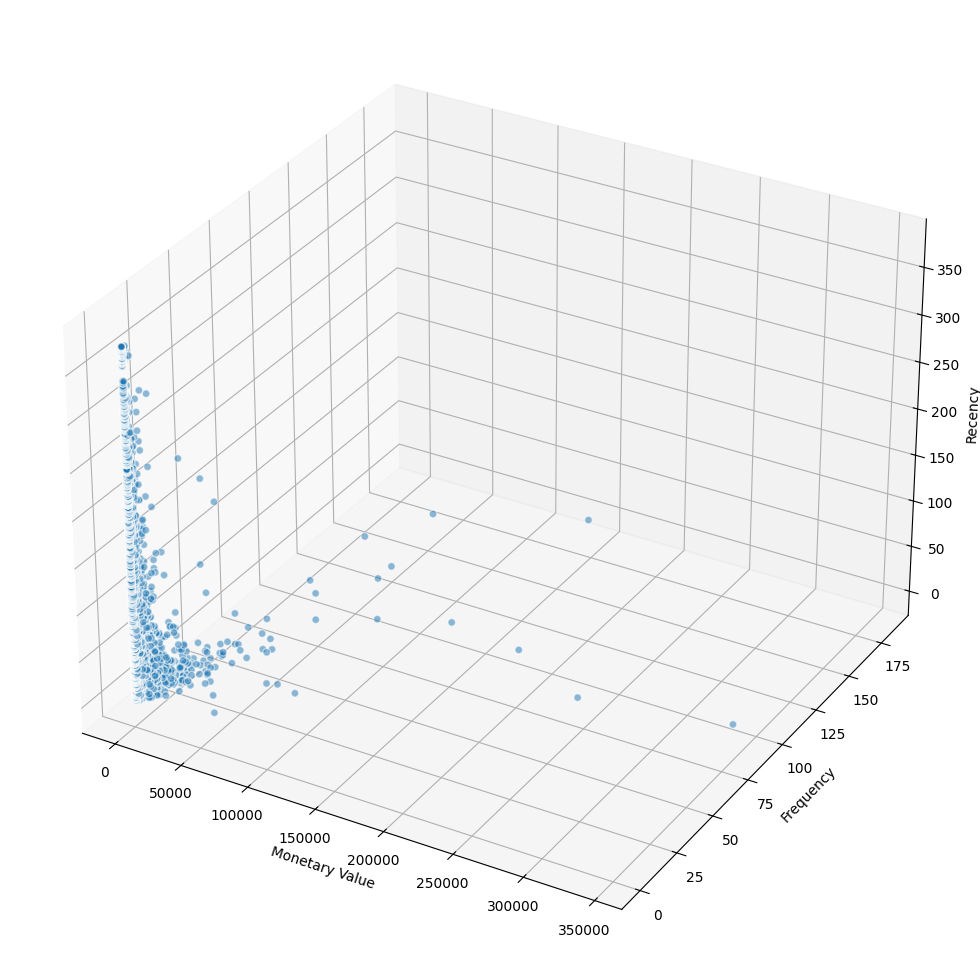

In [37]:
#Variables to plot
x = aggregated_df["MonetaryValue"]
y = aggregated_df["Frequency"]
z = aggregated_df["Recency"]

#My 3D plot
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax = fig.add_subplot(projection="3d")

#Scatter plot in 3D
scatter = ax.scatter(x, y, z, s=30, alpha=0.5, edgecolors='w')

#Labels
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

#Show the plot
plt.show()

We'll formally detect the outliers using the robust Mahalanobis distance

In [38]:
#Package required
from sklearn.covariance import MinCovDet

In [39]:
#Standardization of the variables
scaler = StandardScaler()
standard_data = scaler.fit_transform(aggregated_df[["MonetaryValue", "Frequency", "Recency"]])
standard_data

array([[-0.21192805, -0.30583044,  0.77336428],
       [-0.07914025, -0.30583044, -0.90854315],
       [-0.20531676, -0.43176927, -0.17141088],
       ...,
       [-0.18747602, -0.43176927,  2.13342523],
       [-0.08794271, -0.30583044,  0.22311062],
       [ 0.03218004, -0.05395277, -0.75281098]])

In [40]:
#Fit the data
mcd = MinCovDet(random_state=42).fit(standard_data)

In [41]:
#Compute the robust Mahalanobis
mahalanobis_distances = mcd.mahalanobis(standard_data)
np.set_printoptions(suppress=True) #Remove scientific notation
mahalanobis_distances[:10]

array([   2.15243363,   10.62952532,    1.35358634,   44.45953287,
          1.68964985,    1.77064799,    1.74021792,   88.02141897,
       1844.0424362 ,   31.31796476])

In [42]:
#To dataframe for describe it
mahalanobis_distances = pd.DataFrame(mahalanobis_distances)
pd.set_option('display.float_format', '{:.4f}'.format) #Remove scientific notation
mahalanobis_distances.describe()                               

,0
count,4281.0000
mean,1002.7513
std,29204.4467
min,0.0093
25%,1.7469
50%,3.8843
75%,22.1907
max,1634246.2756


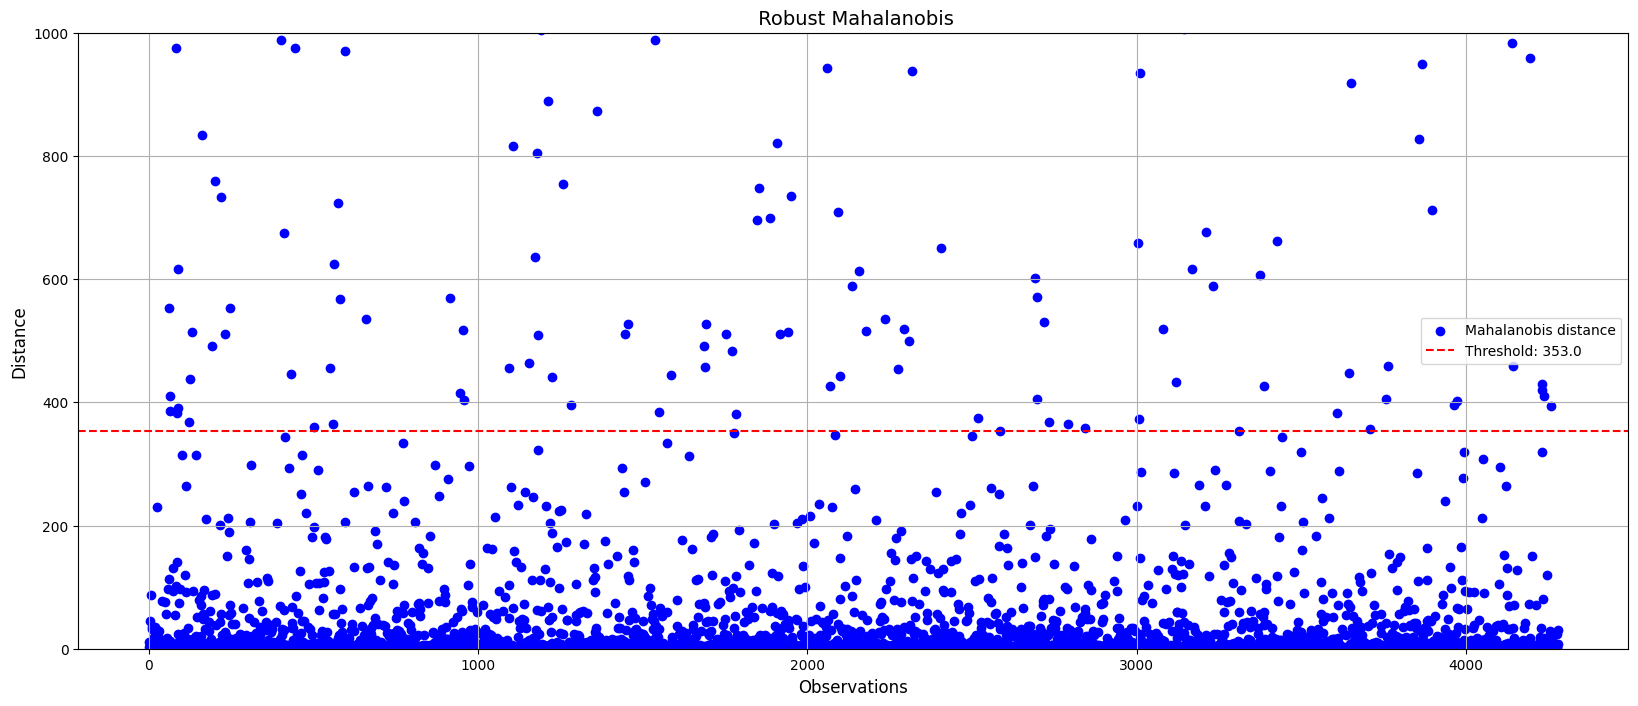

In [43]:
#Plot to see the outliers
plt.figure(figsize=(20, 8))
plt.scatter(range(len(mahalanobis_distances)), mahalanobis_distances, color='blue', label = "Mahalanobis distance")
plt.ylim(0, 1000)

#Reference line
threshold = np.percentile(mahalanobis_distances, 95)
plt.axhline(y = threshold, color = 'red', linestyle = '--', label = f'Threshold: {threshold:.1f}')

plt.title(' Robust Mahalanobis', fontsize=14)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [44]:
#Filter cases above the threshold
outliers = mahalanobis_distances[mahalanobis_distances.values.flatten() > threshold]

#Prints
print(f"Observations above the threshold: {outliers.shape[0]:.1f}")
print(outliers)

#Index and distances
outliers_indices = outliers.index
outliers_distances = outliers.values.flatten()
print("Outliers indexes:")
print(outliers_indices)
print("Outliers distances:")
print(outliers_distances)

Observations above the threshold: 214.0
             0
8    1844.0424
41   2007.0991
47   5295.1062
61    552.8821
63    409.5188
...        ...
4231  430.1195
4232  420.4911
4237  410.8679
4249 6303.8326
4258  394.4078

[214 rows x 1 columns]
Outliers indexes:
Index([   8,   41,   47,   61,   63,   64,   73,   82,   83,   86,
       ...
       4113, 4139, 4143, 4152, 4196, 4231, 4232, 4237, 4249, 4258],
      dtype='int64', length=214)
Outliers distances:
[   1844.0424362     2007.09913127    5295.10620799     552.88208713
     409.51881673     385.3066151     2295.45990578    2633.79249724
     974.74526573     382.23027252     615.63071071     390.31646461
    4566.50911487     368.65135976     438.11994368     514.52585603
     833.67131596    1084.0597549      492.06856354    3426.06637177
    2079.23067749     759.03648299    4546.27340927     733.92647172
     510.62565648   17495.11991409     553.31165651    1568.02195527
    2986.07809347   27528.87251469    1948.35925737    1

In [45]:
#Add the outliers
mahalanobis_distances['Outlier'] = np.where(mahalanobis_distances.values.flatten() > threshold, 'Yes', 'No')

In [46]:
mahalanobis_distances.head(10)

,0,Outlier
0,2.1524,No
1,10.6295,No
2,1.3536,No
3,44.4595,No
4,1.6896,No
5,1.7706,No
6,1.7402,No
7,88.0214,No
8,1844.0424,Yes
9,31.3180,No


In [47]:
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0000,163.4100,2,2010-06-28 13:53:00,164
1,12347.0000,1323.3200,2,2010-12-07 14:57:00,2
2,12348.0000,221.1600,1,2010-09-27 14:59:00,73
3,12349.0000,2221.1400,2,2010-10-28 08:23:00,42
4,12352.0000,343.8000,2,2010-11-29 10:07:00,10
5,12353.0000,317.7600,1,2010-10-27 12:44:00,43
6,12355.0000,488.2100,1,2010-05-21 11:59:00,202
7,12356.0000,3126.2500,3,2010-11-24 12:24:00,15
8,12357.0000,11229.9900,1,2010-11-16 10:05:00,23
9,12358.0000,2150.6100,3,2010-11-29 10:56:00,10


We'll remove the outliers from the aggregated_df dataframe

In [48]:
#Identify the outliers
outlier_indices = mahalanobis_distances[mahalanobis_distances['Outlier'] == 'Yes'].index
#Remove the outliers
aggregated_df_clean = aggregated_df.drop(outlier_indices)
#Results
aggregated_df_clean.shape

(4067, 5)

In [49]:
aggregated_df_clean.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0000,163.4100,2,2010-06-28 13:53:00,164
1,12347.0000,1323.3200,2,2010-12-07 14:57:00,2
2,12348.0000,221.1600,1,2010-09-27 14:59:00,73
3,12349.0000,2221.1400,2,2010-10-28 08:23:00,42
4,12352.0000,343.8000,2,2010-11-29 10:07:00,10
5,12353.0000,317.7600,1,2010-10-27 12:44:00,43
6,12355.0000,488.2100,1,2010-05-21 11:59:00,202
7,12356.0000,3126.2500,3,2010-11-24 12:24:00,15
9,12358.0000,2150.6100,3,2010-11-29 10:56:00,10
10,12359.0000,2563.3600,6,2010-10-10 11:16:00,60


We'll verify how the 3D change without the identify outliers

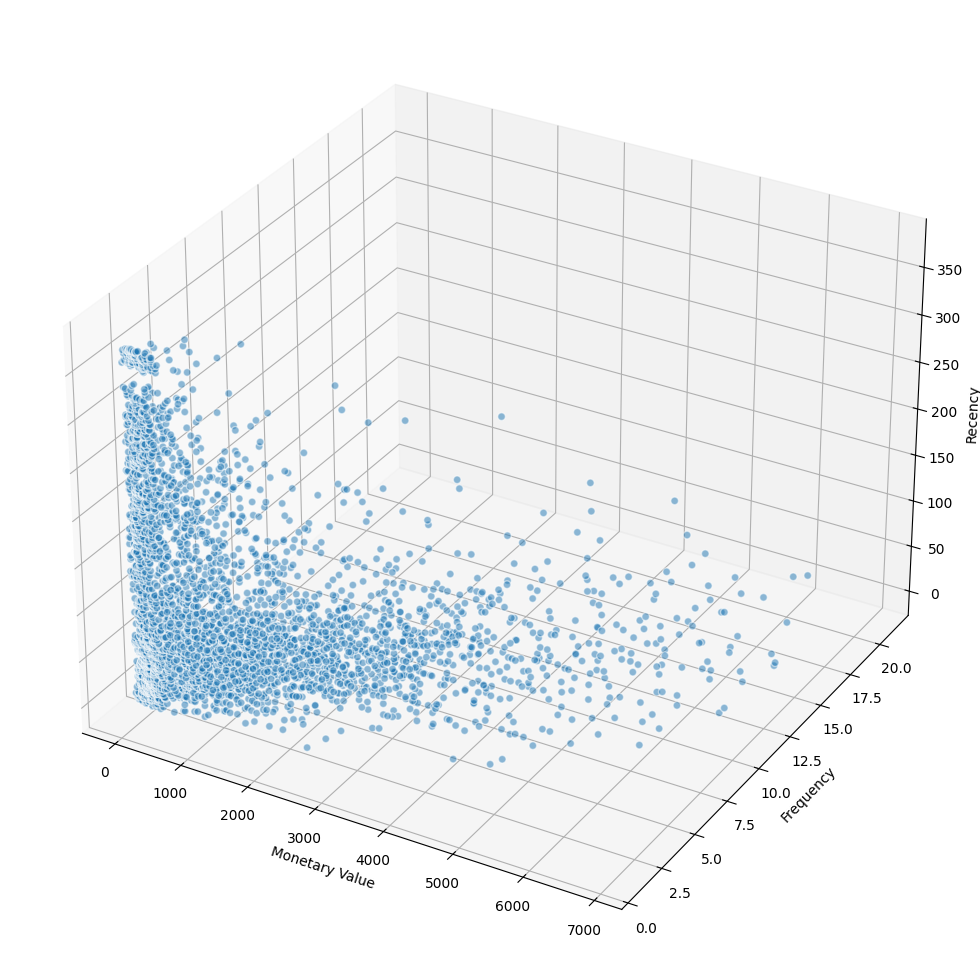

In [50]:
#Variables to plot
x = aggregated_df_clean["MonetaryValue"]
y = aggregated_df_clean["Frequency"]
z = aggregated_df_clean["Recency"]

#My 3D plot
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax = fig.add_subplot(projection="3d")

#Scatter plot in 3D
scatter = ax.scatter(x, y, z, s=30, alpha=0.5, edgecolors='w')

#Labels
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

#Show the plot
plt.show()

Final dataframe ready for modeling

In [51]:
#Select columns
selected_columns = aggregated_df_clean[['MonetaryValue', 'Frequency', 'Recency']]
#Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_columns)
#New dataframe
model_data = pd.DataFrame(standardized_data, columns=['MonetaryValue', 'Frequency', 'Recency'])
model_data.head(10)

,MonetaryValue,Frequency,Recency
0,-0.7875,-0.4433,0.7355
1,0.1788,-0.4433,-0.9345
2,-0.7394,-0.7623,-0.2026
3,0.9268,-0.4433,-0.5222
4,-0.6372,-0.4433,-0.8521
5,-0.6589,-0.7623,-0.5119
6,-0.5169,-0.7623,1.1273
7,1.6809,-0.1243,-0.8005
8,0.8681,-0.1243,-0.8521
9,1.2119,0.8328,-0.3366


# 4. Model Development

We'll use agglomerative clustering to have an idea of how many clusters we could have, then we'll apply kmeans

## 4.1 Agglomerative clustering

**Required package**

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

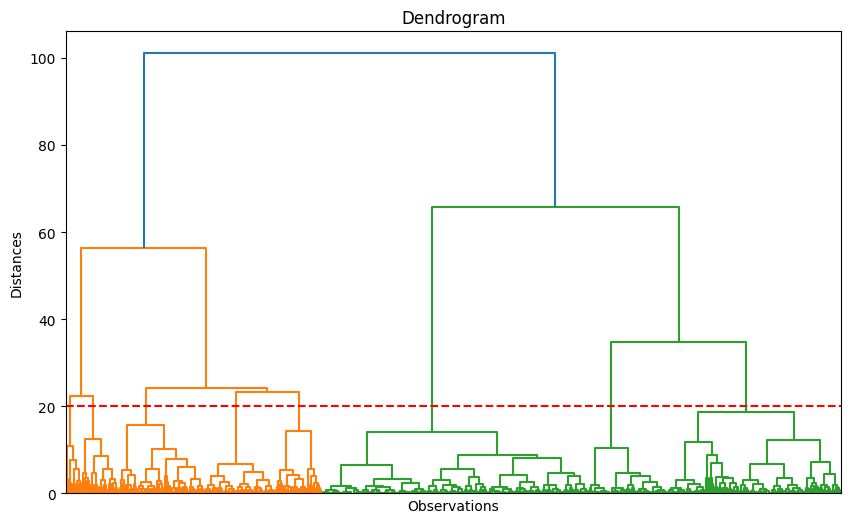

In [53]:
#Linkage matrix
linkage_matrix = linkage(model_data, method='ward')

#Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, no_labels=True)
plt.axhline(y = 20, color = 'red', linestyle = '--')
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distances')
plt.show()

We could have from 5 to 10 clusters

## 4.2 K-Means clustering

**Packages required**

In [54]:
from sklearn.cluster import KMeans #Clustering algorithm
from sklearn.metrics import silhouette_score #Clustering metric

First we'll use the inertia and silhouette indexes to confirm the best number of clusters

In [55]:
#Range of clusters
range_n_clusters = list(range(2, 11))

#Lists to save the indexes
inertia = []
silhouette_scores = []

#Loop over the range of clusters
for n_clusters in range_n_clusters:
    #Applies kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(model_data)
    
    #Gets the inertia
    inertia.append(kmeans.inertia_)
    
    #Gets the silhouette
    silhouette_avg = silhouette_score(model_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

Now let's visualize the results

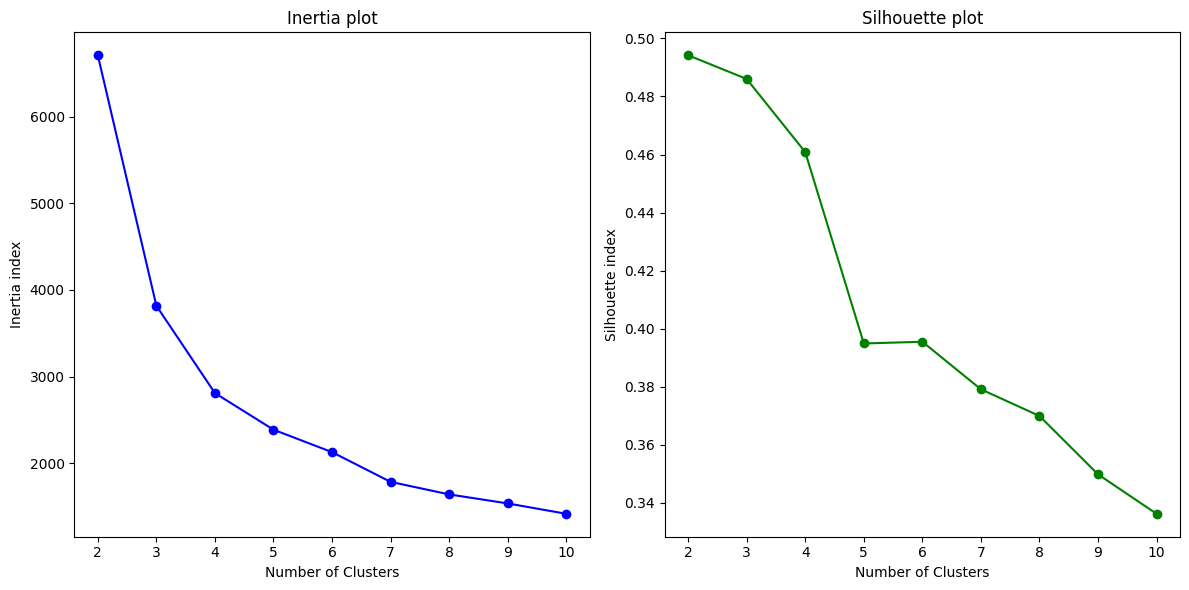

In [56]:
#My plot
plt.figure(figsize=(12, 6))

#Inertia plot
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o', color='blue')
plt.title('Inertia plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia index')

#Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette index')

plt.tight_layout()
plt.show()

# 5. Model Evaluation

We'll plot the silhouettes for the clusters solutions

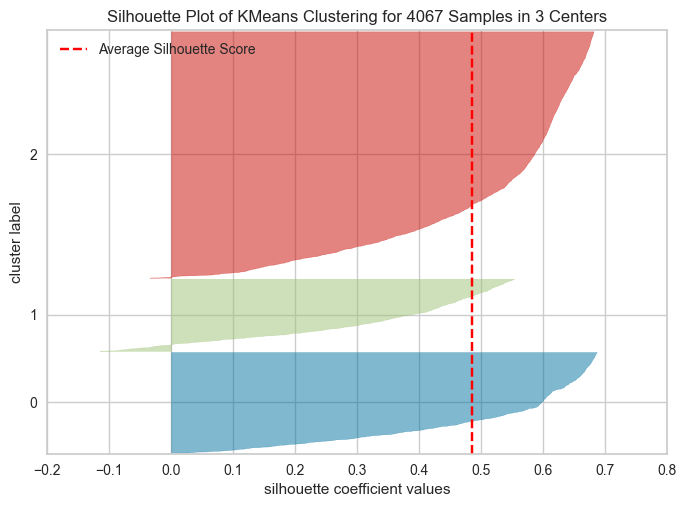

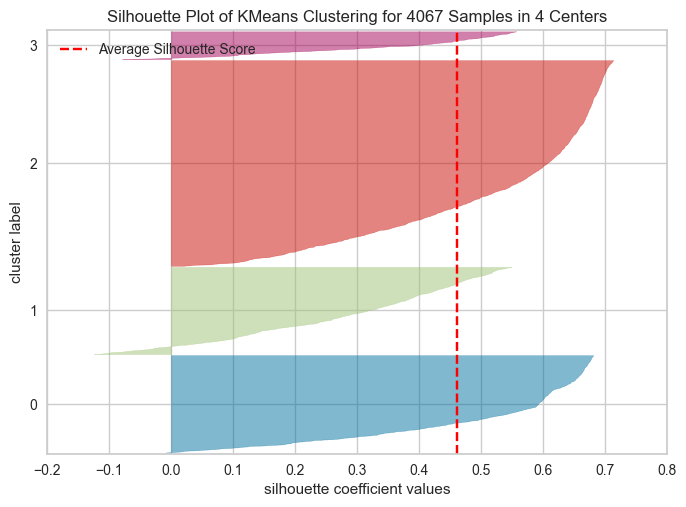

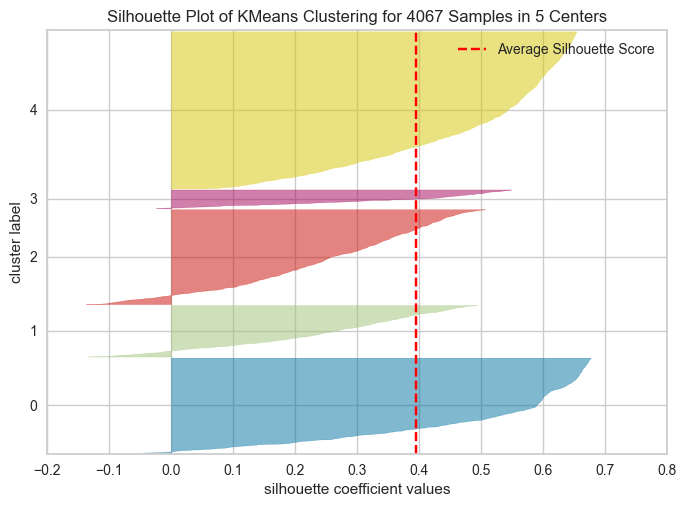

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4067 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer

#Clusters = 3
model_3 = KMeans(n_clusters=3, random_state=42)
visualizer_3 = SilhouetteVisualizer(model_3, colors='yellowbrick')
visualizer_3.fit(model_data)
visualizer_3.show()

#Clusters = 4
model_4 = KMeans(n_clusters=4, random_state=42)
visualizer_4 = SilhouetteVisualizer(model_4, colors='yellowbrick')
visualizer_4.fit(model_data)
visualizer_4.show()

#Clusters = 5
model_5 = KMeans(n_clusters=5, random_state=42)
visualizer_5 = SilhouetteVisualizer(model_5, colors='yellowbrick')
visualizer_5.fit(model_data)
visualizer_5.show()

The 4 clusters solution because it better differentiates some values in the red cluster without reducing too much the silhouette score

We'll visualize the results using PCA

In [58]:
#Package required
from sklearn.decomposition import PCA

## 5.1 Clusters = 4

In [59]:

#PCA with 2 components
pca4 = PCA(n_components=2)
pca_components4 = pca4.fit_transform(model_data)
#To dataframe
pca_df4 = pd.DataFrame(pca_components4, columns=['PCA1', 'PCA2'])
#Add the labels
pca_df4['Cluster'] = model_4.labels_ 
#Explained variance
explained_var4_pca1 = pca4.explained_variance_ratio_[0] * 100
explained_var4_pca2 = pca4.explained_variance_ratio_[1] * 100

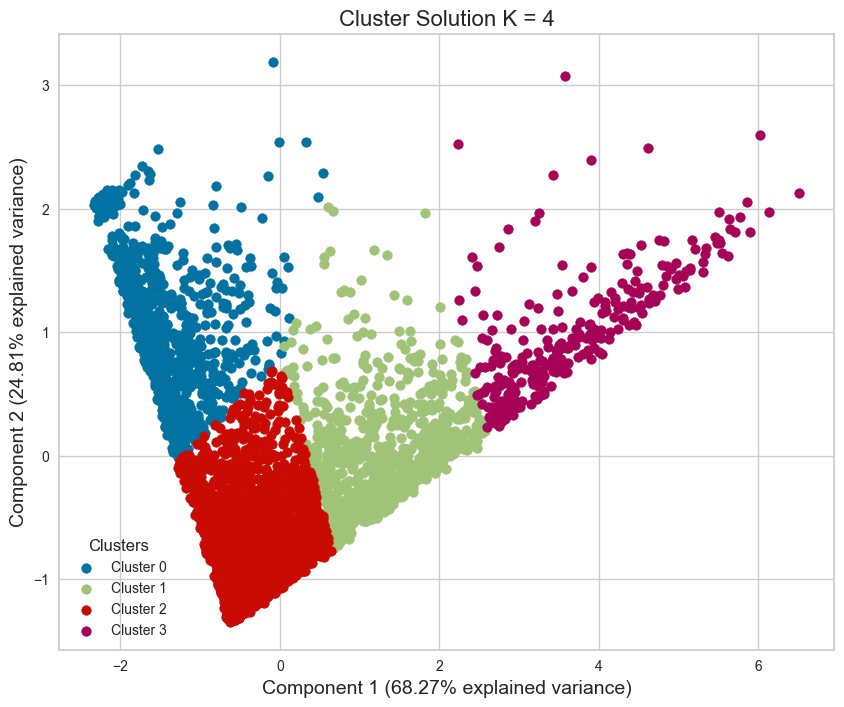

In [60]:
#Visualization
plt.figure(figsize=(10, 8))
for cluster in sorted(pca_df4['Cluster'].unique()):
    cluster_data = pca_df4[pca_df4['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Cluster Solution K = 4', fontsize=16)
plt.xlabel(f'Component 1 ({explained_var4_pca1:.2f}% explained variance)', fontsize=14)
plt.ylabel(f'Component 2 ({explained_var4_pca2:.2f}% explained variance)', fontsize=14)
plt.legend(title='Clusters')
plt.grid(True)
plt.show()

Size of each cluster

In [61]:
#Labels
labels4 = model_4.labels_
#Counting
clusters4, counts = np.unique(labels4, return_counts=True)
#Results
for cluster, count in zip(clusters4, counts):
    print(f"Cluster {cluster}: {count} observations")

Cluster 0: 949 observations
Cluster 1: 848 observations
Cluster 2: 2000 observations
Cluster 3: 270 observations


## 5.2 Clusters = 5

In [62]:
#PCA with 2 components
pca5 = PCA(n_components=2)
pca_components5 = pca5.fit_transform(model_data)
#To dataframe
pca_df5 = pd.DataFrame(pca_components5, columns=['PCA1', 'PCA2'])
#Add the labels
pca_df5['Cluster'] = model_5.labels_ 
#Explained variance
explained_var5_pca1 = pca5.explained_variance_ratio_[0] * 100
explained_var5_pca2 = pca5.explained_variance_ratio_[1] * 100

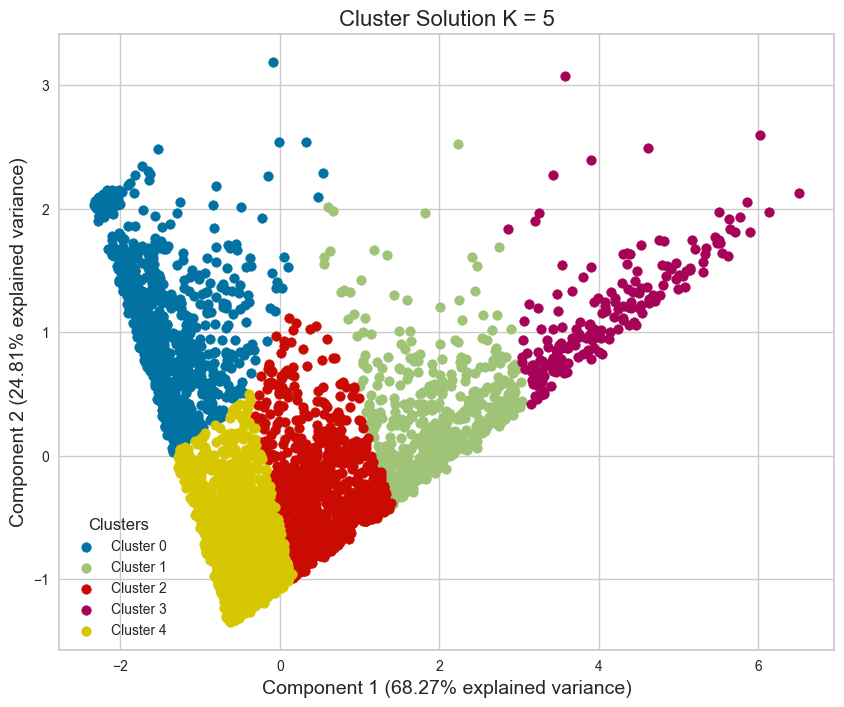

In [63]:
#Visualization
plt.figure(figsize=(10, 8))
for cluster in sorted(pca_df5['Cluster'].unique()):
    cluster_data = pca_df5[pca_df5['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Cluster Solution K = 5', fontsize=16)
plt.xlabel(f'Component 1 ({explained_var5_pca1:.2f}% explained variance)', fontsize=14)
plt.ylabel(f'Component 2 ({explained_var5_pca2:.2f}% explained variance)', fontsize=14)
plt.legend(title='Clusters')
plt.grid(True)
plt.show()

In [64]:
#Labels
labels5 = model_5.labels_
#Counting
clusters5, counts = np.unique(labels5, return_counts=True)
#Results
for cluster, count in zip(clusters5, counts):
    print(f"Cluster {cluster}: {count} observations")

Cluster 0: 927 observations
Cluster 1: 502 observations
Cluster 2: 924 observations
Cluster 3: 183 observations
Cluster 4: 1531 observations


## 5.3 Winner: K = 4

We'll add the labels in the dataframe

In [65]:
aggregated_df_clean["Cluster"] = model_4.labels_
aggregated_df_clean.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0000,163.4100,2,2010-06-28 13:53:00,164,0
1,12347.0000,1323.3200,2,2010-12-07 14:57:00,2,2
2,12348.0000,221.1600,1,2010-09-27 14:59:00,73,2
3,12349.0000,2221.1400,2,2010-10-28 08:23:00,42,1
4,12352.0000,343.8000,2,2010-11-29 10:07:00,10,2
5,12353.0000,317.7600,1,2010-10-27 12:44:00,43,2
6,12355.0000,488.2100,1,2010-05-21 11:59:00,202,0
7,12356.0000,3126.2500,3,2010-11-24 12:24:00,15,1
9,12358.0000,2150.6100,3,2010-11-29 10:56:00,10,1
10,12359.0000,2563.3600,6,2010-10-10 11:16:00,60,1


In [66]:
aggregated_df_clean["Cluster"].value_counts()

Cluster
2    2000
0     949
1     848
3     270
Name: count, dtype: int64

In [67]:
model_4.cluster_centers_

array([[-0.56963732, -0.60093268,  1.5977637 ],
       [ 0.82196437,  0.80222982, -0.55833853],
       [-0.42823456, -0.40952269, -0.42346597],
       [ 2.61787358,  2.6508713 , -0.72808881]])

In [68]:
#Cluster centers
cluster_centers = model_4.cluster_centers_
#Centers to dataframe
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['MonetaryValue', 'Frequency', 'Recency'])

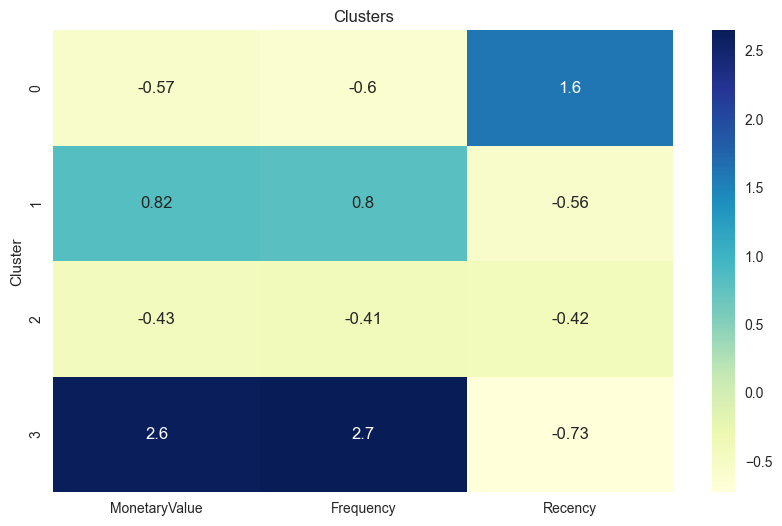

In [69]:
#Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Clusters")
plt.ylabel("Cluster")
plt.show()

Let's make a line plot to better visualize the results

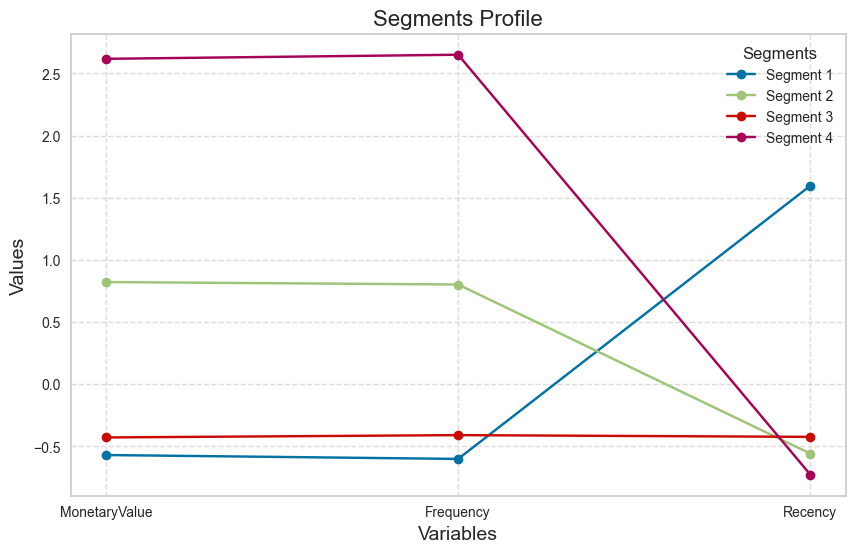

In [72]:
#Add an index to identify the segments
cluster_centers_df['Segment'] = [f"Segment {i+1}" for i in range(len(cluster_centers_df))]

#Transform the dataframe to long format to facilitate plotting
cluster_centers_long = cluster_centers_df.melt(
    id_vars='Segment', var_name='Variable', value_name='Value'
)

#Create the plot
plt.figure(figsize=(10, 6))

#Plot each segment
for segment in cluster_centers_long['Segment'].unique():
    data = cluster_centers_long[cluster_centers_long['Segment'] == segment]
    plt.plot(data['Variable'], data['Value'], marker='o', label=segment)

#Customize the plot
plt.title('Segments Profile', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(title='Segments')
plt.grid(True, linestyle='--', alpha=0.7)

#Show the plot
plt.show()
